In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk("D:\IRIS (1).csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
"D:\IRIS (1).csv"
import numpy as np

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [7]:
df=pd.read_csv('/content/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
final=df.drop(['petal_length','petal_width','species'],axis=1)
final

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [9]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [10]:
y_predicted=km.fit_predict(final[['sepal_length','sepal_width']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [11]:
final['cluster']=y_predicted
final

,sepal_length,sepal_width,cluster
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,2
147,6.5,3.0,0
148,6.2,3.4,0


In [12]:
final.head(100)

,sepal_length,sepal_width,cluster
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
95,5.7,3.0,2
96,5.7,2.9,2
97,6.2,2.9,2
98,5.1,2.5,2


In [13]:
final1=final[final.cluster==0]
final2=final[final.cluster==1]
final3=final[final.cluster==2]

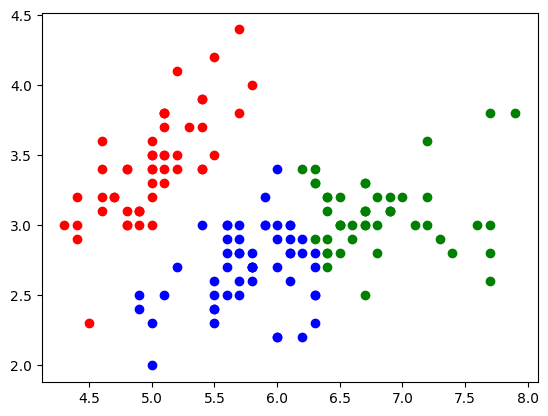

In [14]:
plt.scatter(final1.sepal_length,final1.sepal_width,color='green')
plt.scatter(final2.sepal_length,final2.sepal_width,color='red')
plt.scatter(final3.sepal_length,final3.sepal_width,color='blue')

In [15]:
scaler=MinMaxScaler()
scaler.fit(final[['sepal_length']])
final['sepal_length']=scaler.transform(final[['sepal_length']])
final

,sepal_length,sepal_width,cluster
0,0.222222,3.5,1
1,0.166667,3.0,1
2,0.111111,3.2,1
3,0.083333,3.1,1
4,0.194444,3.6,1
...,...,...,...
145,0.666667,3.0,0
146,0.555556,2.5,2
147,0.611111,3.0,0
148,0.527778,3.4,0


In [16]:
scaler.fit(final[['sepal_width']])
final['sepal_width']=scaler.transform(final[['sepal_width']])
final

,sepal_length,sepal_width,cluster
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1
...,...,...,...
145,0.666667,0.416667,0
146,0.555556,0.208333,2
147,0.611111,0.416667,0
148,0.527778,0.583333,0


In [17]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(final[['sepal_length','sepal_width']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [18]:
final['clusters']=y_predicted

In [19]:
final

,sepal_length,sepal_width,cluster,clusters
0,0.222222,0.625000,1,1
1,0.166667,0.416667,1,1
2,0.111111,0.500000,1,1
3,0.083333,0.458333,1,1
4,0.194444,0.666667,1,1
...,...,...,...,...
145,0.666667,0.416667,0,2
146,0.555556,0.208333,2,0
147,0.611111,0.416667,0,2
148,0.527778,0.583333,0,2


In [20]:
final.drop('cluster',axis='columns',inplace=True)
final

,sepal_length,sepal_width,clusters
0,0.222222,0.625000,1
1,0.166667,0.416667,1
2,0.111111,0.500000,1
3,0.083333,0.458333,1
4,0.194444,0.666667,1
...,...,...,...
145,0.666667,0.416667,2
146,0.555556,0.208333,0
147,0.611111,0.416667,2
148,0.527778,0.583333,2


In [21]:
final1=final[final.clusters==0]
final2=final[final.clusters==1]
final3=final[final.clusters==2]

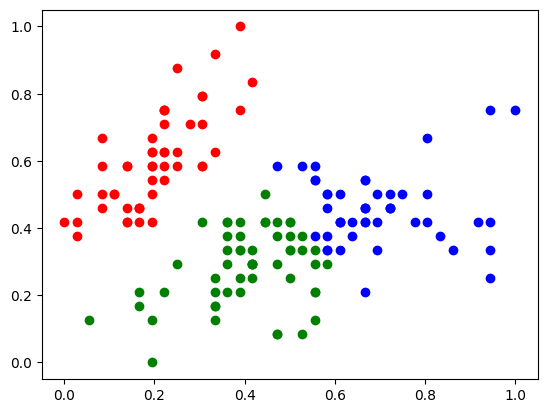

In [22]:
plt.scatter(final1.sepal_length,final1.sepal_width,color='green')
plt.scatter(final2.sepal_length,final2.sepal_width,color='red')
plt.scatter(final3.sepal_length,final3.sepal_width,color='blue')